# Star Wars Survey

## Introduction

The team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In this project, I will clean and explore the dataset in Jupyter notebook.

## Introducing the Dataset

We need to specify an encoding, because the dataset has some characters that aren't in Python's default utf-8 encoding.

The data has several columns, including the following:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location (Census Region)` — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a `Yes` or `No` response
- `Do you consider yourself to be a fan of the Star Wars film franchise?`  a `Yes` or `No` response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

### Reading in the Data

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

### Exploring the Data

Now we will look for any strange values in the columns and rows

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

A first observation
- Star Wars seems to be popular in the age group 18-29
- There seem to be multiple unnamed columns

In [3]:

i = 0
for col in star_wars.columns:
    print("col[{}] {} ".format(i, col))
    i += 1


col[0] RespondentID 
col[1] Have you seen any of the 6 films in the Star Wars franchise? 
col[2] Do you consider yourself to be a fan of the Star Wars film franchise? 
col[3] Which of the following Star Wars films have you seen? Please select all that apply. 
col[4] Unnamed: 4 
col[5] Unnamed: 5 
col[6] Unnamed: 6 
col[7] Unnamed: 7 
col[8] Unnamed: 8 
col[9] Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. 
col[10] Unnamed: 10 
col[11] Unnamed: 11 
col[12] Unnamed: 12 
col[13] Unnamed: 13 
col[14] Unnamed: 14 
col[15] Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her. 
col[16] Unnamed: 16 
col[17] Unnamed: 17 
col[18] Unnamed: 18 
col[19] Unnamed: 19 
col[20] Unnamed: 20 
col[21] Unnamed: 21 
col[22] Unnamed: 22 
col[23] Unnamed: 23 
col[24] Unnamed: 24 
col[25] Unnamed: 25 
col[26] Unnamed: 26 
col[27] Unnamed: 27 
col[28] Unnamed: 2

Observations of columns:
- There are 23 unnamed columns
- There are some very long column names

## Cleaning and Mapping Yes/No Columns

Take a look at the next two columns:

- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. We can use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the `pandas.Series.map()` method on series objects to perform the conversion.

We can use a dictionary to define a mapping from each value in series to a new value. Then, we can call the map() function to perform the mapping.

## Converting Columns to Boolean Type

In [4]:
# Defining a dictionary
yes_no = {
    "Yes": True,
    "No": False
}

In [5]:
# Converting the column
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

# Exploring values
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
# Converting the column
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

# Exploring values
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Checkbox Columns

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

- `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace.`
- `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones.`
- `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith.`
- `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope.`
- `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back.`
- `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi.`

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

In [7]:
#Firstly to see the responses made in each column so I can map correctly
j_list = [3,4,5,6,7,8] #List of columns by integer

for j in j_list:
    print(star_wars.columns[j])
    print(star_wars[star_wars.columns[j]].value_counts(dropna=False))
    print('\n')

Which of the following Star Wars films have you seen? Please select all that apply.
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


Unnamed: 4
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64


Unnamed: 5
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: Unnamed: 5, dtype: int64


Unnamed: 6
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: Unnamed: 6, dtype: int64


Unnamed: 7
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: Unnamed: 7, dtype: int64


Unnamed: 8
Star Wars: Episode VI Return of the Jedi    738
NaN                                         448
Name: Unnamed: 8, dtype: int64




In [8]:
#Creating mapping dictionary
import numpy as np
film_dict={
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.NaN: False
}

#Now map film_dict across to columns

for j in j_list:
    star_wars[star_wars.columns[j]] = star_wars[star_wars.columns[j]].map(film_dict)
    print(star_wars[star_wars.columns[j]].value_counts(dropna=False))
    print('\n')

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64


False    615
True     571
Name: Unnamed: 4, dtype: int64


False    636
True     550
Name: Unnamed: 5, dtype: int64


True     607
False    579
Name: Unnamed: 6, dtype: int64


True     758
False    428
Name: Unnamed: 7, dtype: int64


True     738
False    448
Name: Unnamed: 8, dtype: int64




## Renaming the Columns

I will now rename the columns so these will be more intuitive.

In [9]:
# Creating dictionary for columns
new_cols = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5" : "seen_3", 
    "Unnamed: 6" : "seen_4",
    "Unnamed: 7" : "seen_5",
    "Unnamed: 8" : "seen_6"
}

# Renaming the columns
star_wars = star_wars.rename(columns=new_cols)

# Printing new columns
i = 0
for col in star_wars.columns:
    print("col[{}] {} ".format(i, col))
    i += 1

col[0] RespondentID 
col[1] Have you seen any of the 6 films in the Star Wars franchise? 
col[2] Do you consider yourself to be a fan of the Star Wars film franchise? 
col[3] seen_1 
col[4] seen_2 
col[5] seen_3 
col[6] seen_4 
col[7] seen_5 
col[8] seen_6 
col[9] Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. 
col[10] Unnamed: 10 
col[11] Unnamed: 11 
col[12] Unnamed: 12 
col[13] Unnamed: 13 
col[14] Unnamed: 14 
col[15] Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her. 
col[16] Unnamed: 16 
col[17] Unnamed: 17 
col[18] Unnamed: 18 
col[19] Unnamed: 19 
col[20] Unnamed: 20 
col[21] Unnamed: 21 
col[22] Unnamed: 22 
col[23] Unnamed: 23 
col[24] Unnamed: 24 
col[25] Unnamed: 25 
col[26] Unnamed: 26 
col[27] Unnamed: 27 
col[28] Unnamed: 28 
col[29] Which character shot first? 
col[30] Are you familiar with the Expanded Universe? 
col

## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`   - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

We can do the numeric conversion with the pandas.DataFrame.astype() method on DataFrames.

### Converting Columns to Float Type

In [10]:
# Converting to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)


k_list = [9,10,11,12,13,14]

for k in k_list:
    print(star_wars.columns[k])
    print(star_wars[star_wars.columns[k]].value_counts(dropna=False))
    print('\n')

Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
NaN    351
4.0    237
6.0    168
3.0    130
1.0    129
5.0    100
2.0     71
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64


Unnamed: 10
NaN    350
5.0    300
4.0    183
2.0    116
3.0    103
6.0    102
1.0     32
Name: Unnamed: 10, dtype: int64


Unnamed: 11
NaN    351
6.0    217
5.0    203
4.0    182
3.0    150
2.0     47
1.0     36
Name: Unnamed: 11, dtype: int64


Unnamed: 12
NaN    350
1.0    204
6.0    161
2.0    135
4.0    130
3.0    127
5.0     79
Name: Unnamed: 12, dtype: int64


Unnamed: 13
NaN    350
1.0    289
2.0    235
5.0    118
3.0    106
4.0     47
6.0     41
Name: Unnamed: 13, dtype: int64


Unnamed: 14
NaN    350
2.0    232
3.0    220
1.0    146
6.0    145
4.0     57
5.0     36
Name: Unnamed: 14, dtype: int64




## Renaming Column Names

Now I will give the columns that are now converted to a float type, a more descriptive name.

In [11]:
# Creating dictionary for column names
new_cols ={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "rank_movie1",
    "Unnamed: 10" : "rank_movie_2",
    "Unnamed: 11" : "rank_movie_3",
    "Unnamed: 12" : "rank_movie_4",
    "Unnamed: 13" : "rank_movie_5",
    "Unnamed: 14" : "rank_movie_6" 
}

star_wars = star_wars.rename(columns=new_cols)
i = 0
for col in star_wars.columns:
    print("col[{}] {} ".format(i, col))
    i += 1

col[0] RespondentID 
col[1] Have you seen any of the 6 films in the Star Wars franchise? 
col[2] Do you consider yourself to be a fan of the Star Wars film franchise? 
col[3] seen_1 
col[4] seen_2 
col[5] seen_3 
col[6] seen_4 
col[7] seen_5 
col[8] seen_6 
col[9] rank_movie1 
col[10] rank_movie_2 
col[11] rank_movie_3 
col[12] rank_movie_4 
col[13] rank_movie_5 
col[14] rank_movie_6 
col[15] Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her. 
col[16] Unnamed: 16 
col[17] Unnamed: 17 
col[18] Unnamed: 18 
col[19] Unnamed: 19 
col[20] Unnamed: 20 
col[21] Unnamed: 21 
col[22] Unnamed: 22 
col[23] Unnamed: 23 
col[24] Unnamed: 24 
col[25] Unnamed: 25 
col[26] Unnamed: 26 
col[27] Unnamed: 27 
col[28] Unnamed: 28 
col[29] Which character shot first? 
col[30] Are you familiar with the Expanded Universe? 
col[31] Do you consider yourself to be a fan of the Expanded Universe? 
col[32] Do you consider yourself to be a fan of the Star

##  Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. To do this, take the mean of each ranking columns using the pandas.DataFrame.mean() method on DataFrames.

### Computing the Mean

Now I will compute the mean of each `ranking` column.

In [12]:
print(star_wars[star_wars.columns[9:15]].mean())

star_wars2 = star_wars[["rank_movie1", "rank_movie_2", "rank_movie_3", "rank_movie_4", "rank_movie_5", "rank_movie_6"]].mean(axis=0)

rank_movie1     3.732934
rank_movie_2    4.087321
rank_movie_3    4.341317
rank_movie_4    3.272727
rank_movie_5    2.513158
rank_movie_6    3.047847
dtype: float64


### Creating Bart Chart

Now I will make a bar chart of each mean.

Text(0, 0.5, 'Average Viewer Preference')

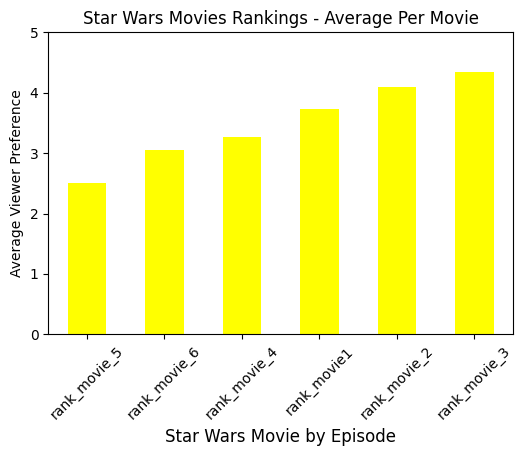

In [25]:
%matplotlib inline
ax = star_wars2.sort_values().plot(kind='bar', rot=45, color= 'yellow') #makes plots of series or DataFrame

ax.set_ylim(0,5) 
ax.set_title("Star Wars Movies Rankings - Average Per Movie", fontsize=12)
ax.set_xlabel("Star Wars Movie by Episode", fontsize=12)
ax.set_ylabel("Average Viewer Preference", fontsize=10)

**Summary**:

I selected the rankings columns of the Star_wars dataset and calculated the mean value per column. After this I plotted the selected dataset as a bar horizontal bar plot with on the y axis the Average Viewer Preference, and on the x axis the rankings per movie.

The movie: "Star Wars: Episode V The Empire Strikes Back" is the highest-ranked one. To conclude, the bar chart shows that the first three episodes, V, VI and IV are the most popular movies. These are chronologically the first three movies of the Star Wars series. 

I think the respondents ranked the original movies higher, because these were the first ones and probably because they are more nostalgic towards these.

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. When we call methods like pandas.DataFrame.sum() or `mean()`, they treat Booleans like integers. They consider `True` a `1` and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

Text(0.5, 1.0, 'Number of Viewers per Star Wars Episode')

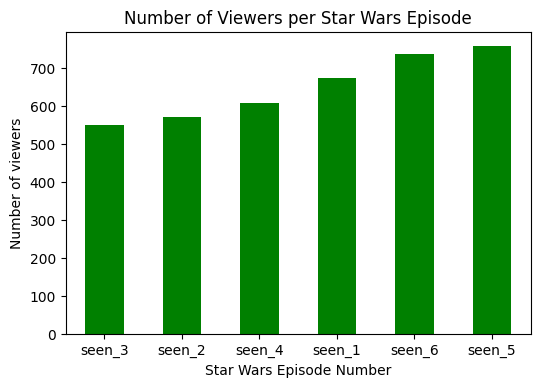

In [14]:
%matplotlib inline

# Computing the sum of each seen columns
most_viewed = star_wars[star_wars.columns[3:9]].sum()

# Creating a bar chart of each ranking
most_viewed = most_viewed.sort_values().plot(kind='bar', color='green', rot=0)
most_viewed.set_xlabel("Star Wars Episode Number")
most_viewed.set_ylabel("Number of viewers")
most_viewed.set_title("Number of Viewers per Star Wars Episode")

**Summary**

Of all the movies, movie number 5 is the most seen. Therefore it is also logcial that this movie is the most popular one.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` — True or False
- `Do you consider yourself to be a fan of the Star Trek franchise?` — `Yes` or `No`
- `Gender` — `Male` or `Female`

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. The subsets allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

## Splitting the Data

In [15]:
#Splitting the dataframe into two groups
males = star_wars[star_wars['Gender']=='Male']
print(males.shape)
females = star_wars[star_wars['Gender']=='Female']
print(females.shape)

(497, 38)
(549, 38)


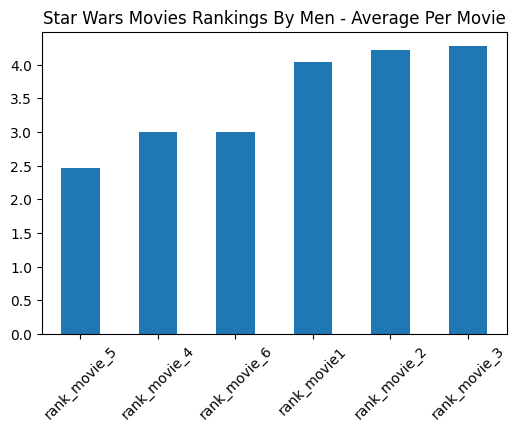

In [16]:
%matplotlib inline

ax = males[males.columns[9:15]].mean(axis=0)
ax.sort_values().plot(kind = 'bar', rot=45, title = "Star Wars Movies Rankings By Men - Average Per Movie")

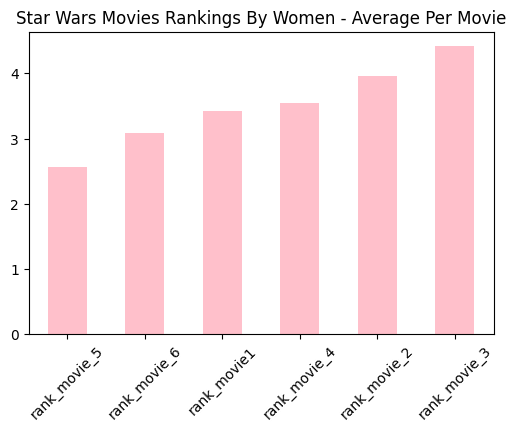

In [22]:
ax = females[females.columns[9:15]].mean(axis=0)
ax.sort_values().plot(kind = 'bar', rot=45, title = "Star Wars Movies Rankings By Women - Average Per Movie", color='pink')

**Conclusion**

The rankings of the movies don't seem to differ too much regarding gender. However, in the top three of women are episodes 5, 6 and 1 and in the top three of men are episodes 5, 4 and 6, all of the classics.

## Analyzing Movies Seen by Gender

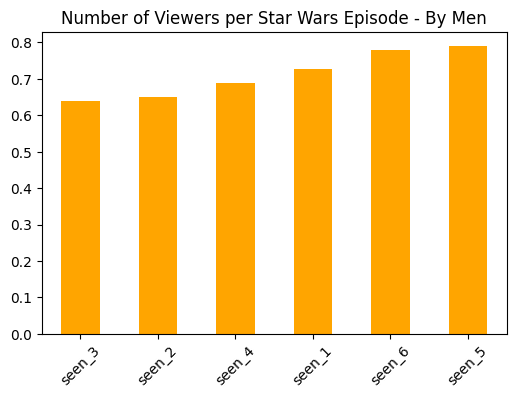

In [23]:
ax = males[males.columns[3:9]].mean(axis=0)
ax.sort_values().plot(kind = 'bar', rot=45, title = "Number of Viewers per Star Wars Episode - By Men", color = 'orange')

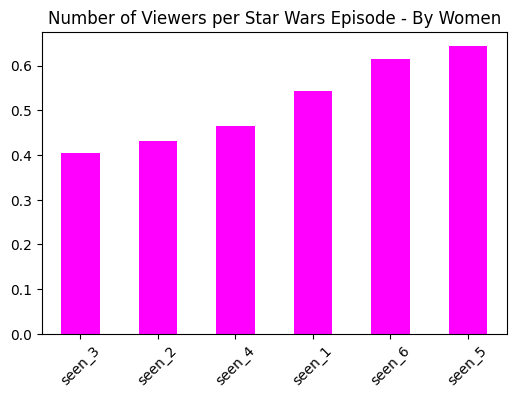

In [24]:
ax = females[females.columns[3:9]].mean(axis=0)
ax.sort_values().plot(kind = 'bar', rot=45, title = "Number of Viewers per Star Wars Episode - By Women", color = 'fuchsia')

**Conclusion**

There are no remarkable differences in rating and total movies seen if categorized by gender.

In [50]:
# Splitting the dataframe on the 'Gender' column and selecting only the ranking columns 
males_rankings = star_wars[star_wars['Gender'] == 'Male'][star_wars.columns[9:15]]
female_rankings = star_wars[star_wars['Gender'] == 'Female'][star_wars.columns[9:15]]

# Calculating the mean ranking for each movie by gender
males_rankings_mean = males_rankings.mean().reset_index(name='rankings') #setting new index
women_rankings_mean = female_rankings.mean().reset_index(name='rankings') #setting new index
#males_rankings_mean = males_rankings.mean().reset_index() #setting new index
#women_rankings_mean = female_rankings.mean().reset_index() #setting new index

print(males_rankings_mean)
print('\n')
print(women_rankings_mean)

          index  rankings
0   rank_movie1  4.037825
1  rank_movie_2  4.224586
2  rank_movie_3  4.274882
3  rank_movie_4  2.997636
4  rank_movie_5  2.458629
5  rank_movie_6  3.002364


          index  rankings
0   rank_movie1  3.429293
1  rank_movie_2  3.954660
2  rank_movie_3  4.418136
3  rank_movie_4  3.544081
4  rank_movie_5  2.569270
5  rank_movie_6  3.078086


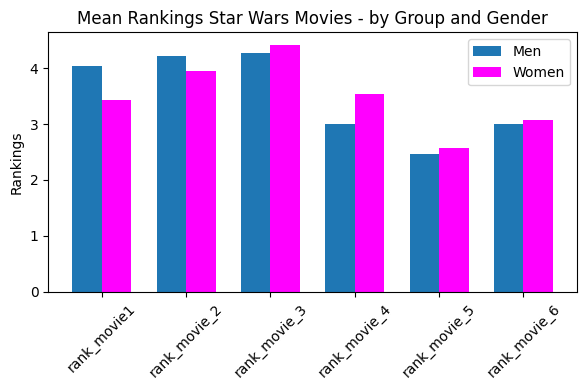

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Converting series to lists for both subsets    
males_mean = males_rankings_mean['rankings'].to_list()
women_mean = women_rankings_mean['rankings'].to_list()

# Creating labels from the index
labels = males_rankings.mean().index.to_list()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, males_mean, width, label='Men')
rects2 = ax.bar(x + width/2, women_mean, width, label='Women', color = 'fuchsia')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rankings')
ax.set_title('Mean Rankings Star Wars Movies - by Group and Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()


fig.tight_layout()

plt.show()